## 5. Data visualization

The purpose of this document is not to exhaust the graphics features of the library and graphics components which are already built in. There are good reasons why such a goal would be inappropriate:

* the library it's still in working phase, even there are many components ready for production use; any careful enumeration would be incomplete as soon as another graphical features would be added
* stressing the whole features even for a single component would be time consuming since working with all the combinations of graphical aspect options would take too much space to time for everybody

The goal of this document is to illustrate the core ideas behind the graphic system and to provide enough examples to have a fast and productive feedback.

The design of the graphical components of this library is influenced by many ideas from existing popular graphical systems. Among the main inspirations there are some which deserves appropriate consideration: `R` standard graphical library, `ggplot2` package and `matplotlib` from Python stack.

### 5.1 Brief overview

Drawing of graphical figures or text output is handled by classes which implements interface `rapaio.printer.Printer`. There are some built-in implementations of this interface. The default one is `StandardPrinter`, which allows printing text at console and drawing graphics in a Swing modal window. Another used implementation is `IdeaPrinter`, which is similar with standard printer for text output, but for graphics drawing implements a TCP/IP protocol with serialization which allows plug-ins like `rapaio-studio` to handle graphics drawing.

A printer can be instantiated by itself by a handy way of using it is by the means of the utility class called `rapaio.sys.WS` (which comes from **W**ork **W**pace). This is an utility class which offers static shortcut methods yo allow one to simulate a working session. This class has an instance of a printer implementation (which can be changes by `WS.setPrinter` method) and shortcuts for text output and drawing.

We are interested here in methods for drawing, so the workspace contains methods for this purpose. All of those methods works with a construct which contains all the indications regarding what kind of graphic should be built. This construct implements interface `rapaio.graphics.Figure`. Thus a figure is a construct which allows the printer system to obtain images which can be later drawn over graphical surfaces. Also, there are methods which allows one to obtain an image directly from a figure, or store an image directly on a disk file.

Here are the shortcut methods implemented in `WS` utility:

* *void draw(Figure figure)* - draws a figure in a printing system; the size of drawing is either adaptive of has the default size of a graphical image contained in the printer implementation.

* *void draw(Figure figure, int width, int height)* - draws a figure with dimensions specified by width and height

* *BufferedImage buildImage(Figure figure)* - builds an image from a figure with dimensions specified as default width and default height from printer system

* *BufferedImage buildImage(Figure figure, int width, int height)* - builds an image from a figure with specified dimensions

* *void saveImage(Figure figure, int width, int height, String fileName)* - builds an image with specified dimensions by width and height from a given figure, and save the image into a *png* file with the specified file name

* *void saveImage(Figure figure, int width, int height, OutputStream os)* - builds an image with specified dimensions by width and height, and send the image in *png* format to the specified output stream (could be a file or could be sent over network)



In [1]:
%load ../rapaio-bootstrap

Now in order to build figures one can instantiate and compose figures directly in a pure Java way. However graphical tools offers also a class named `rapaio.graphics.Plotter` which has a lot of shortcut methods to help one to simplify the above code. Here is an example:

In [2]:
Frame iris = Datasets.loadIrisDataset();

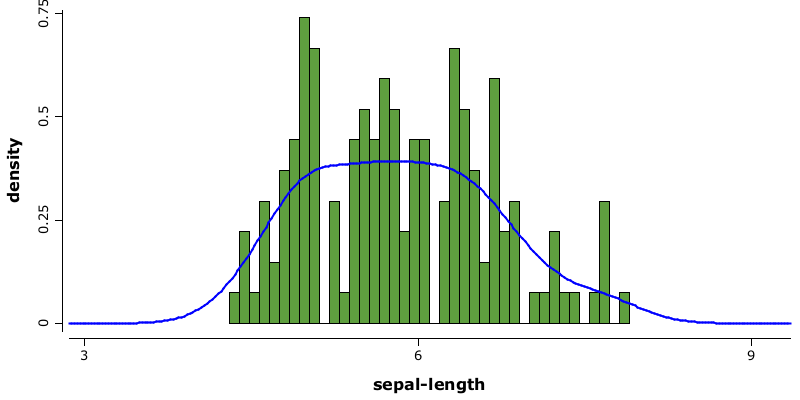

In [4]:
WS.image(hist(iris.rvar("sepal-length"), 0, 10, bins(40), fill(10), prob(true))
.densityLine(iris.rvar("sepal-length"), lwd(2), color(2)));

### 5.2 Box plots

A box plot is a standard way of displaying information about the distribution of a continuous data variable based on five data summary. The five data summary consists of: *minimum*, *first quartile*, *median* (*second quartile*), *third quartile* and *maximum* number summaries.

Box plots might be constructed in different manners by different authors. The common characteristics for all types of box-plots is *the box*.

Which means that in all cases the bottom margin of the box lies on first quartile, the top margin of the box lies on third quartile and the line inside the box lies on median values.

The extensions which comes from the box might differ and `rapaio` system implements the version which it's usually named: **Tuckey's box plot**. What is specific to this box plot is that the whiskers lies at the datum still within 1.5 IQR (*Interquartile range*).

Any other points above or below whiskers are outliers. Outliers are of two different types:

* *extreme outliers* - outliers which are at a distance greater or equal than 3*IQR
* *outliers* - outliers which are at a distance greater or equal than 1.5*IQR

##### Example 1

**Scope**: *Draw one box plot for each numerical variable from iris data set. We want each box plot to have a different color and we want some de-saturated colors.*

**Solution**:


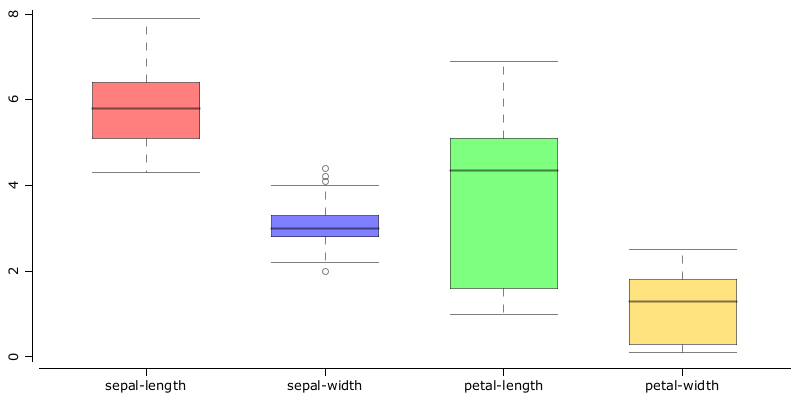

In [7]:
WS.image(boxplot(iris.mapVars("0~3"), fill(1, 2, 3, 4), alpha(0.5f)))

* `iris.mapVars("0~3")` - obtain a data set from `iris` data set, by keeping only the first 4 variables. We do that using the range notation (index of the start variable, concatenation symbol `~`, index of the last variable inclusive). Pay attention that variable indexes are 0 based.

* `color(1, 2, 3, 4)` - we use colors from the current color palette, indexed with the specified integer values.

* `alpha(0.3f)` - we de-saturate the drawing keeping only 0.3 of the actual color.


##### Example 2

**Scope**: *In order to identify the overlap between values of `sepal-length` variable from iris data set, we draw one box plot for each segment of the nominal `class` variable, and add a title*


**Solution**:

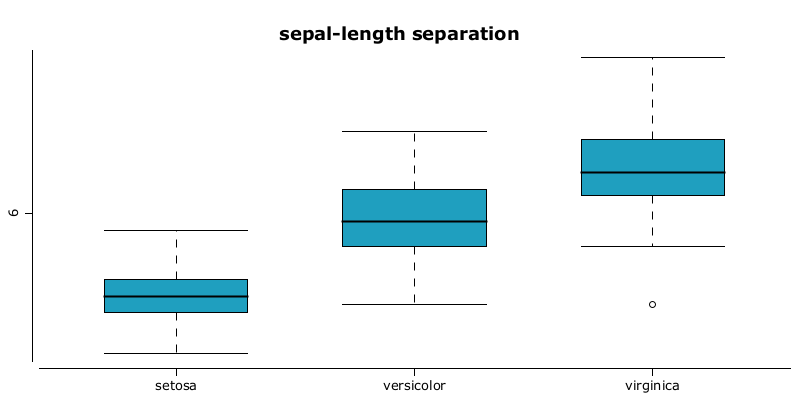

In [11]:
WS.image(boxplot(iris.rvar("sepal-length"), iris.rvar("class"), fill(6)).title("sepal-length separation"));

* `iris.var("sepal-length")` - is the variable named `sepal-length` from

* `iris` - data set, which is the numerical variable to be segmented and later box-plotted

* `iris.var("class")` - specifies the segment discriminator, depending on the levels of this variable, the same number of levels will be created

* `.title("..")` - adds a title to the box plot

### 5.3 XY Scatter plots

We can study the relation between two numerical variables by drawing one point for each instance.

##### Example 1

**Scope**: *Study which is the relation between `petal-length` and `sepal-length` from `iris` data set.*

**Solution**:

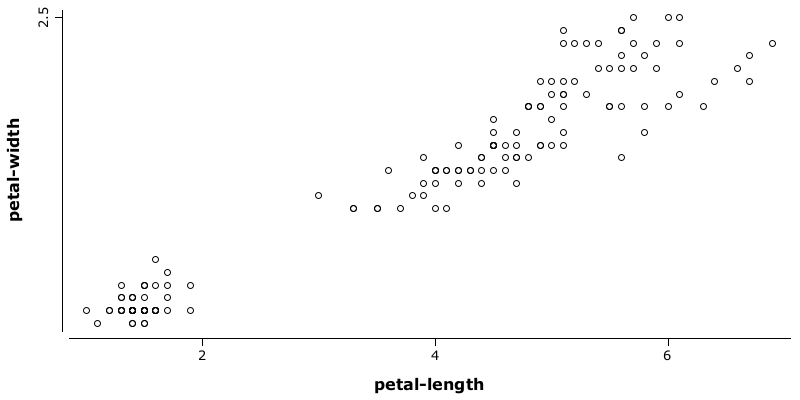

In [12]:
WS.image(points(iris.rvar("petal-length"), iris.rvar("petal-width")));

* `iris.var("petal-length")` - variable used to define horizontal axis
* `iris.var("petal-width")` - variable used to define vertical axis

##### Example 2

**Scope**: *Study which is the relation between `petal-length` and `sepal-length` from `iris` data set. Color each point with a different color corresponding with value from variable `class` and add a legend for colors.*

**Solution**:

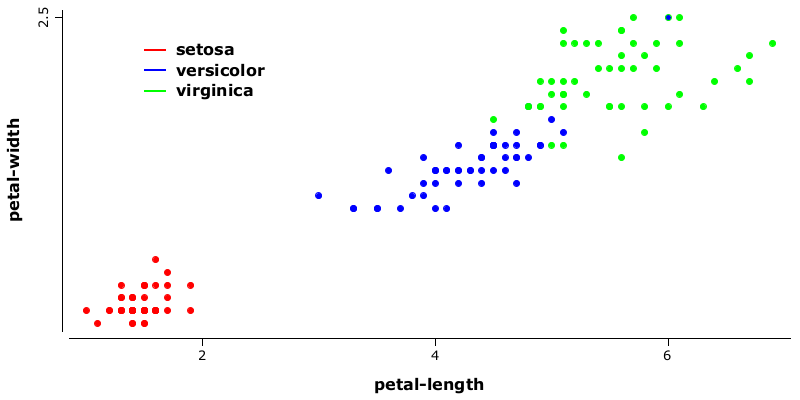

In [13]:
WS.image(points(iris.rvar("petal-length"), iris.rvar("petal-width"),color(iris.rvar("class")), pch(2))
.legend(1.5, 2.2, labels("setosa", "versicolor", "virginica")));

* `iris.getVar("petal-length")` - variable used to define horizontal axis
* `iris.getVar("petal-width")` - variable used to define vertical axis
* `color(iris.getVar("class"))` - nominal variable which provides indexes to select colors from current palette
* `pch(2)` - select the type of figure used to draw points (in this case is a circle filled with solid color and a black border)
* `legend(1.5, 2.2, labels("setosa", "versicolor", "virginica"))` - adds a legend at the specific position specified in the data range; labels are specified by parameter, colors are taken as default from current palette starting with 1

### 5.4 Histogram

A histogram is a graphical representation of the distribution of a continuous variable.

The histogram is only an estimation of the distribution. To construct a histogram you have to *bin* the range of values from the variable in a sequence of equal length intervals, and later on counting the values from each bin. Histograms can display counts, or can display proportions which are counts divided by the total number of values.

Because the histogram uses bins that the main parameter of a histogram is the bin width. The bin's width is computed. To compute the width of a bin we need the number of bins and the minimum and maximum from the range of values. The range of values can be computed automatically from data or it can be specified when the histogram is built.

We can omit the number of bins, in which case its value is estimated also from data. For estimation is used the Freedman-Diaconis rule. See [Freedman-Diaconis wikipedia page](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) for more details.

##### Example 1

**Scope**: *Build a histogram with default values to estimate the pdf of `sepal-length` variable from `iris` data set.*

**Solution**:

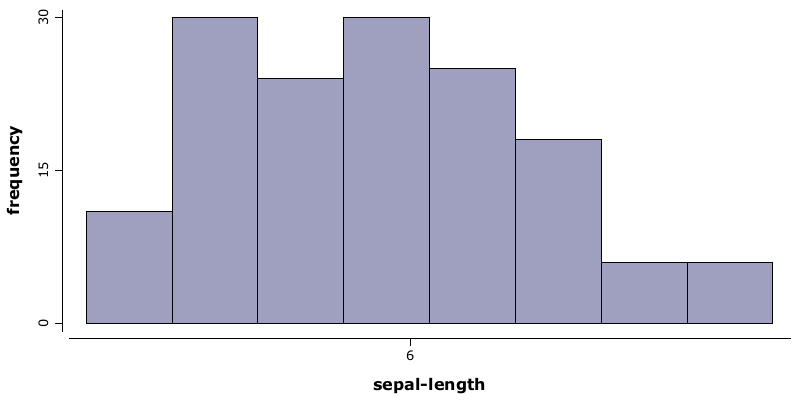

In [14]:
WS.image(hist(iris.rvar("sepal-length")));

##### Example 2

**Scope**: *Build two overlapped histograms with default values to estimate the pdf of `sepal-length` and `petal-length` variables from `iris` data set. We want to get bins in range (0-10) of width 0.25, colored with red, and blue, with a big transparency for visibility*

**Solution**:

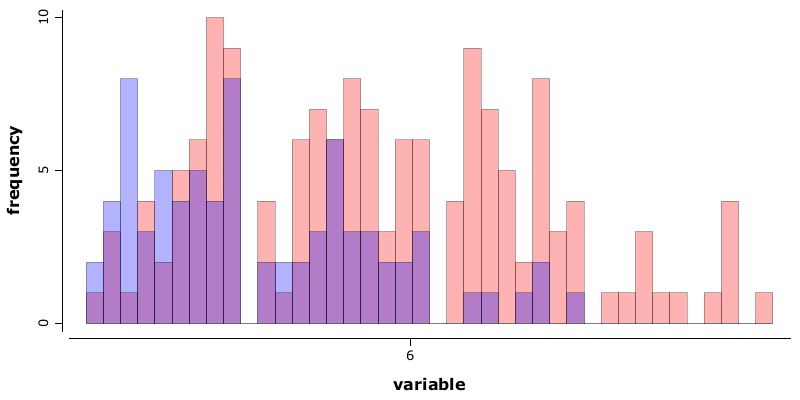

In [18]:
WS.image(plot(alpha(0.3f))
.hist(iris.rvar("sepal-length"), 0, 10, bins(40), fill(1))
.hist(iris.rvar("petal-length"), 0, 10, bins(40), fill(2))
.legend(7, 20, labels("sepal-length", "petal-length"), color(1, 2))
.xLab("variable"));

* `plot(alpha(0.3f))` - builds an empty plot; this is used only to pass default values for alpha for all plot components, otherwise the plot construct would not be needed
* `hist` - adds a histogram to the current plot
* `iris.getVar("sepal-length")` - variable used to build histogram
* `0, 10` - specifies the range used to compute bins
* `bins(40)` - specifies the number of bins for histogram
* `color(1)` - specifies the color to draw the histogram, which is the color indexed with 1 in color palette (in this case is red)
* `legend(7, 20, ...)` - draws a legend at the specified coordinates, values are in the units specified by data
* `labels(..)` - specifies labels for legend
* `color(1, 2)` - specifies color for legend
* `xLab` = specifies label text for horizontal axis

### 5.5 Density line

A density line is a graphical representation of the distribution of a continuous variable. The density line is similar with a histogram in purpose but it has a different strategy to build the estimate. The density line plot component implements a *kernel density estimator* which is basically a non-parametric smoothing method, named also Parzen-Rosenblatt window method.

There are two main parameters for a density line: bandwidth and base density kernel function.
The default bandwidth is computed according with Silverman's rule of thumb (more details on
__[Wikipedia kernel density page](https://en.wikipedia.org/wiki/Kernel_density_estimation)__).
The default kernel function is the Gaussian pdf.

Kernel function estimators can be constructed using various kernel functions like Gaussian, uniform, triangular, Epanechnikov, cosine, tricube, triweight, biweight. All of them are available in `rapaio` library and also some custom can be built.

##### Example 1

**Scope**: *Illustrate the process of building the KDE estimation*

**Solution**:

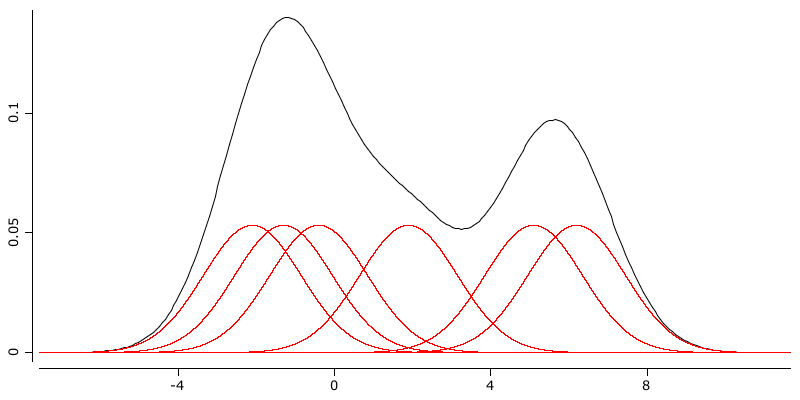

In [21]:
// this is our sample
VarDouble x = VarDouble.wrap(-2.1, -1.3, -0.4, 1.9, 5.1, 6.2);

// declare a bandwidth for smoothing
double bw = 1.25;

// build a density line
Plot p = densityLine(x, bw);

// for each point draw a normal distribution
x.stream().forEach(s -> p.funLine(xi -> Normal.of(s.getDouble(), bw).pdf(xi) / x.size(),
color(1)));
WS.image(p);

With red are depicted the kernel functions used to spread probability around sample points. With black is depicted the kernel density estimation which is the sum of all individual kernel functions.

##### Example 2

**Scope**: *Estimate density of iris `sepal-length` variable by histogram and density function*

**Solution**:

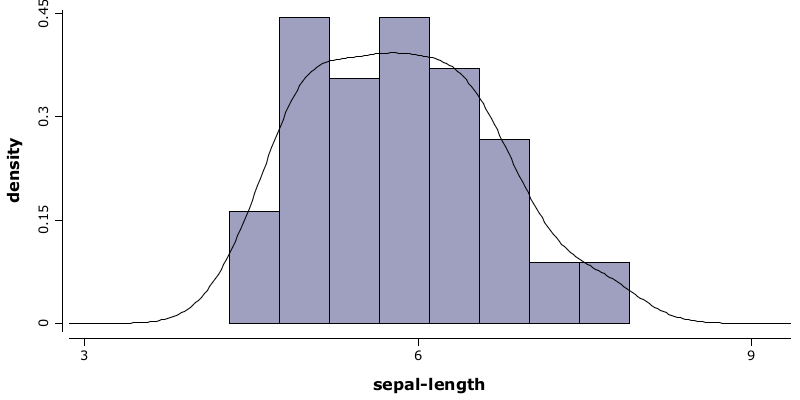

In [22]:
WS.image(hist(iris.rvar("sepal-length"), prob(true))
.densityLine(iris.rvar("sepal-length")));

* `hist(..)` - builds a histogram
* `iris.getVar("sepal-length")` - variable used to build histogram and also to build the density line
* `prob(true)` - parameter which specifies to a histogram to use probabilities (approximated by frequency ratios)
* `densityLine(..)` - builds a density line

##### Example 3

**Scope**: *Build multiple kernel density estimates for various bandwidth values*

**Solution**:

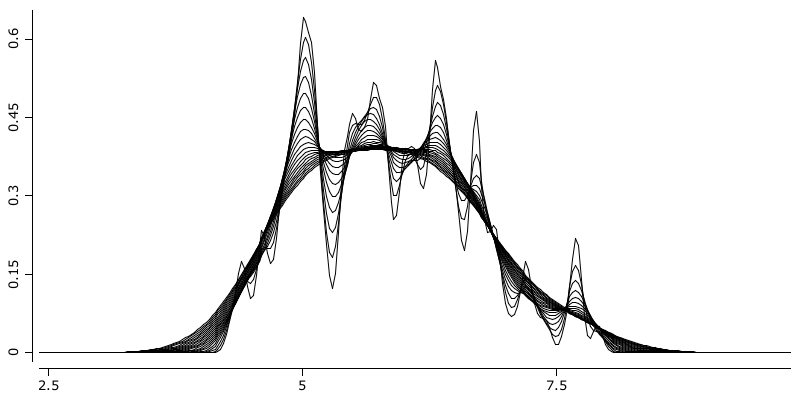

In [23]:
Plot p2 = plot();
DoubleStream.iterate(0.05, xi -> xi + 0.02).limit(20).forEach(v -> p2.densityLine(iris.rvar("sepal-length"), v));
WS.image(p2);